In [1]:
# mount gdrive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from PIL import Image
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [4]:
os.chdir('dogs-vs-cats/dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')
        
os.chdir('../../')

        

In [5]:
train_path = 'C:/Users/IM/Desktop/Degree UniKL/SEMESTER 4 UNIKL MIIT/Principles of Artificial Intelligence/Lab 6/dogs-vs-cats/dataset/train'
valid_path = 'C:/Users/IM/Desktop/Degree UniKL/SEMESTER 4 UNIKL MIIT/Principles of Artificial Intelligence/Lab 6/dogs-vs-cats/dataset/valid'
test_path = 'C:/Users/IM/Desktop/Degree UniKL/SEMESTER 4 UNIKL MIIT/Principles of Artificial Intelligence/Lab 6/dogs-vs-cats/dataset/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size = 10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2


In [8]:

imgs , labels = next(train_batches)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-115.68..104.32].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..129.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-118.68..144.061].
Clipping input data t

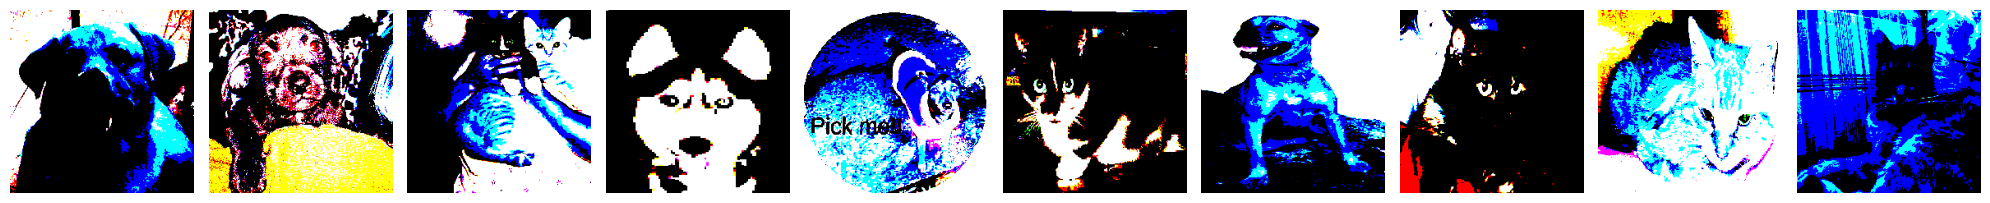

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [10]:
plotImages(imgs)
print(labels)

In [11]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model.fit(x=train_batches, validation_data = valid_batches, epochs =10, verbose = 2)

Epoch 1/10


# Model Accuracy

In [ ]:
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

# Training Loss

In [ ]:
plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis = -1))

In [ ]:
def plot_confusion_matrix(cm,classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
loss,acc = model.evaluate(test_imgs, test_labels, batch_size=10)

# Pre-trained on VGG16 network

## Load the the model fom Keras library

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

### From the above model summary there are about 138 millions parameters!

In [ ]:
type(vgg16_model)

Training on a large parameter network such as VGGnet takes too long to train. This can be speed up using transfer learning. 
A transfer learning means we are just training our model using the new dataset without changing the weights on the previous trained model. 

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

As you can see, the number of parameters are reduced to only 8 thousands. Now we are simply trying to train the model on the dataset that we will feed into the network.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model.fit(x=train_batches, steps_per_epoch = len(train_batches), validation_data = valid_batches, validation_steps=len(valid_batches),
         epochs = 5, verbose =2)

In [ ]:
plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [ ]:
test_imgs, test_labels = next(test_batches)

In [ ]:
plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_batches, steps = len(test_batches), verbose = 0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))


In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')


In [ ]:
loss,acc = model.evaluate(test_imgs, test_labels, batch_size=10)

# Let's try on different datasets

In [ ]:
os.chdir('Sign-Language-Digits-Dataset/Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [ ]:
train2_path='C:/Users/ASUS_USER/Desktop/Aye/Python/program/Keras/Sign-Language-Digits-Dataset/Dataset/train'
test2_path='C:/Users/ASUS_USER/Desktop/Aye/Python/program/Keras/Sign-Language-Digits-Dataset/Dataset/test'
valid2_path = 'C:/Users/ASUS_USER/Desktop/Aye/Python/program/Keras/Sign-Language-Digits-Dataset/Dataset/valid'

In [ ]:
#class=['0','1','2','3','4','5','6','7','8','9']
train2_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=train2_path, target_size=(224,224), classes= ['0','1','2','3','4','5','6','7','8','9'], batch_size = 10)
valid2_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=valid2_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7','8','9'], batch_size = 10)
test2_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=test2_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7','8','9'], batch_size = 10, shuffle=False)

In [ ]:
assert train2_batches.n == 1712
assert valid2_batches.n == 300
assert test2_batches.n == 50
assert train2_batches.num_classes == valid2_batches.num_classes == test2_batches.num_classes == 10

In [ ]:
imgs2 , labels2 = next(train2_batches)

In [ ]:
plotImages(imgs2)
print(labels2)

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history3 = model.fit(x=train2_batches, steps_per_epoch = len(train2_batches), validation_data = valid2_batches, validation_steps=len(valid2_batches),
         epochs = 10, verbose =2)

In [ ]:
plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
plt.subplot(2,1,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [ ]:
test2_imgs, test2_labels = next(test2_batches)

In [ ]:
plotImages(test2_imgs)
print(test2_labels)

In [ ]:
predictions = model.predict(x=test2_batches, steps = len(test2_batches), verbose = 0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true = test2_batches.classes, y_pred = np.argmax(predictions, axis = -1))
test2_batches.class_indices

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')


In [ ]:
loss,acc = model.evaluate(test2_imgs, test2_labels, batch_size=10)